# Application the equivalent layer technique for estimating the magnetization direction: Montes Claros complex of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading data

In [7]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [8]:
result_mclaros = dict()

### Saving files

In [9]:
saved_files = []

### airborne survey information

In [10]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Properties of the model

### Main field

In [11]:
inc_gf,dec_gf = data['main_field']

In [12]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [13]:
h = 392.

#### Generating a layer

In [14]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [15]:
i_pos = 1500

In [16]:
it_max = 30

In [17]:
it_marq = 15

In [18]:
lamb = 10.
dlamb = 100.

In [19]:
eps_e = 1e-4
eps_i = 1e-4

In [20]:
mu_list = [1e2,1e3,1e4,1e5,2.5*1e5,5*1e5,7.5*1e5,1e6]

In [21]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_40'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-70.,50.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_40'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-68.72207288088438 47.45714873504119
0.004585442704674505
i = 1
-67.50074832642912 45.41874208370192
0.00406190663911932
i = 2
-66.34800328940719 43.740367896420466
0.0036151008945719087
i = 3
-65.26246714191619 42.33690666232701
0.003231106304694945
i = 4
-64.24075878433617 41.15498430356772
0.002888990842058238
i = 5
-63.27987250867017 40.15480502925632
0.0025805096048710724
i = 6
-62.37973161124397 39.30668805876792
0.002288513213063289
i = 7
-61.539782780836966 38.58840512157197
0.002011895856325617
i = 8
-60.759227690606856 37.9801137376025
0.0017537829810198302
i = 9
-60.02490910315796 37.458104587790714
0.0015656278163880587
i = 10
-59.334484484788014 37.01106387477884
0.001394496719435224
i = 11
-58.68491861050559 36.62861555263366
0.0012426949424441391
i = 12
-58.07433598783149 36.302636471462556
0.001104603200959556
i = 13
-57.4998488583049 36.02565380702256
0.0009830784020982719
i = 14
-56.95862770907366 35.790237851737565
0.0008774898265877937
i = 15
-56.4476408685451

-49.06796941772264 35.499114017871385
0.0
i = 0
-68.75542072077748 47.4200233963962
0.004006900553902098
i = 1
-67.55524167240621 45.36632203055999
0.003540384685497631
i = 2
-66.42021069698556 43.682241849528616
0.0031376993677213793
i = 3
-65.35426071750223 42.27836285670664
0.002780227492917421
i = 4
-64.35229312334342 41.10019631194791
0.002469091205350483
i = 5
-63.412884072168985 40.10485832018693
0.00218747813587977
i = 6
-62.53455177255459 39.26073542461683
0.001929265978927504
i = 7
-61.716013020631266 38.54552806591566
0.0016886278739675434
i = 8
-60.94666905156951 37.9329159413289
0.0015031524957299718
i = 9
-60.22224765860419 37.40731584759487
0.0013418633921138943
i = 10
-59.541123326665236 36.957145278271966
0.0011937706494287797
i = 11
-58.90035326401539 36.57216145777292
0.0010623482399328694
i = 12
-58.29759272999103 36.243637883892504
0.000944842810047212
i = 13
-57.73011963988245 35.96364132440655
0.0008416298915797861
i = 14
-57.1954934944345 35.725796721708214
0.00

-68.43828672160535 33.28714146453405
0.00013043784846924816
i = 11
-68.354223080157 32.50554543622256
0.0001084679535503861
i = 12
-68.27568741770878 31.758816399497874
0.0


## L-curve visualization

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


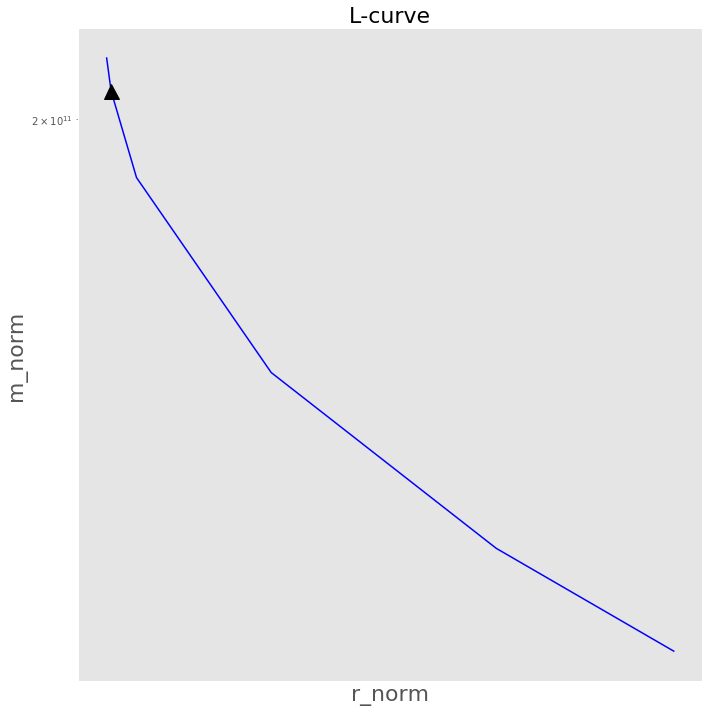

In [29]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.loglog(norm_r,norm_m, 'b-')
plt.plot(norm_r[3],norm_m[3], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [23]:
result_mclaros['magnetic_moment'] = m_est
result_mclaros['inc_est'] = incl_est
result_mclaros['dec_est'] = decl_est
result_mclaros['layer_depth'] = h
result_mclaros['reg_parameter'] = mu_list
result_mclaros['phi'] = phi_list

### Generating .pickle file

In [24]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_mclaros['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [25]:
file_name = 'data/result_mclaros.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_mclaros, f)
    
saved_files.append(file_name)

### Saved files

In [26]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_mclaros.pickle
